## __GIBots ML Assignment__


 - ___Name: Banuprakash V___
 - ___E-Mail ID: banuprakashmec@gmail.com___

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __Problem Statement:__

_Developing a machine learning model capable of predicting the probability that a given piece of text belongs to a specific class or category. This task involves text classification, where the goal is to assign one or more predefined categories or labels to text documents based on their content. The model should analyze textual data and output the likelihood or probability that the input text falls into each category._

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#### __Loading The Data:__


 __Data Description:__

1. ***train.csv:*** Contains features for the training set, with each row representing a sample and each column representing a feature.

2. ***trainLabels.csv:*** Contains expected labels for the training set, with rows corresponding to samples and columns to labels.

3. ***test.csv:*** Similar to train.csv, containing features for the test set, used for model testing.

4. ***sampleSubmission.csv:*** Provides an example of expected probabilities for the test set, with rows containing identifiers and corresponding probabilities for each label.





In [1]:
#Importing Dependencies
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#---------------------------------------------------------------------------
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
#Train data
df_train=pd.read_csv('train.csv')
#---------------------------------------------------------------------------
#Train data lables
df_train_labels=pd.read_csv('trainLabels.csv')
#---------------------------------------------------------------------------
#Test data
df_test=pd.read_csv('test.csv',header=None)
#---------------------------------------------------------------------------
#Submission file data
df_submission=pd.read_csv('sampleSubmission_small.csv')

In [3]:
df_train.head(3)

id   x1   x2                                            x3  \
0   1   NO   NO  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
1   2  NaN  NaN                                           NaN   
2   3   NO   NO  ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=   

                                             x4        x5        x6        x7  \
0  GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=  0.576561  0.073139  0.481394   
1                                           NaN  0.000000  0.000000  0.000000   
2  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  1.341803  0.051422  0.935572   

         x8        x9  x10  x11  x12  x13  x14  x15       x16  x17  x18  \
0  0.115697  0.472474  YES   NO   NO   NO   NO   42  0.396065    3    6   
1  0.000000  0.000000  NaN  NaN  NaN  NaN  NaN    0  0.000000    0    0   
2  0.041440  0.501710   NO   NO  YES   NO   NO    2  0.838475    3    5   

        x19  x20   x21   x22   x23  x24  x25  x26  x27       x28       x29  \
0  0.991018  0.0  0.82  3306  4676  YES   NO  YES    0  0.405047  0.464610   
1  0.000000  0.0  0.00     0     0  NaN  NaN  NaN    0  0.000000  0.000000   
2  0.966122  0.0  0.74  4678  3306   NO   NO   NO    2  0.872353  0.493159   

  x30 x31  x32  x33                                           x34  \
0  NO  NO   NO   NO  mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=   
1  NO  NO   NO   NO  l0G2rvmLGE6mpPtAibFsoW/0SiNnAuyAc4k35TrHvoQ=   
2  NO  NO  YES  YES  9TRXThP/ifDpJRGFX1LQseibUA1NJ3XM53gy+1eZ46k=   

                                            x35       x36       x37       x38  \
0  s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=  0.576561  0.073139  0.481394   
1  lblNNeOLanWhqgISofUngPYP0Ne1yQv3QeNHqCAoh48=  1.058379  0.125832  0.932547   
2  XSJ6E8aAoZC7/KAu3eETpfMg3mCq7HVBFIVIsoMKh9E=  1.341803  0.051422  0.935572   

        x39       x40  x41 x42  x43 x44  x45  x46       x47  x48  x49  \
0  0.115697  0.458560  YES  NO  YES  NO   NO    9  0.368263    2   10   
1  0.663037  0.569047  YES  NO   NO  NO   NO    9  0.709921    5    6   
2  0.041440  0.447627  YES  NO   NO  NO  YES    2  0.752269    5    7   

        x50  x51   x52   x53   x54  x55 x56  x57  x58       x59       x60  \
0  0.992729  0.0  0.94  3306  4676  YES  NO  YES    1  0.375535  0.451301   
1  0.968240  0.0  0.81  4678  3306  YES  NO  YES    3  0.741682  0.560282   
2  0.954930  0.0  0.82  4678  3306  YES  NO  YES    2  0.797338  0.438435   

                                            x61 x62 x63  \
0  +2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=  NO  NO   
1  MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=  NO  NO   
2  cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=  NO  NO   

                                            x64  \
0  Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=   
1  TqL9cs8ZFzALzVpZv6wYBDi+6zwhrdarQE/3FH+XAlA=   
2  oFsUwSLCWcj8UA1cqILh5afKVcvwlFA+ohJ147Wkz5I=   

                                            x65       x66       x67       x68  \
0  GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=  0.576561  0.073139  0.481394   
1  aZTF/lredyP4cukeN8bh6kpBjYmS1QFNpPOg2LVm3Lg=  1.058379  0.125832  0.932547   
2  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  1.341803  0.051422  0.935572   

        x69       x70  x71 x72 x73 x74 x75  x76       x77  x78  x79       x80  \
0  0.115697  0.487598  YES  NO  NO  NO  NO   42  0.363131    6   10  0.987596   
1  0.663037  0.628474  YES  NO  NO  NO  NO    2  0.679371    8    7  0.937387   
2  0.041440  0.522873  YES  NO  NO  NO  NO    1  0.732305    6    6  0.954930   

   x81   x82   x83   x84  x85 x86  x87  x88       x89       x90  \
0  0.0  0.71  3306  4676  YES  NO  YES    0  0.375535  0.479734   
1  0.0  0.84  4678  3306  YES  NO  YES    1  0.741984  0.619282   
2  0.0  0.80  4678  3306  YES  NO  YES    0  0.777374  0.513681   

                                            x91 x92 x93  \
0  bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=  NO  NO   
1  YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=  NO  NO   
2  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  NO  NO   

 

In [4]:
df_train_labels.head(2)

id  y1  y2  y3  y4  y5  y6  y7  y8  y9  y10  y11  y12  y13  y14  y15  y16  \
0   1   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
1   2   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   

   y17  y18  y19  y20  y21  y22  y23  y24  y25  y26  y27  y28  y29  y30  y31  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   y32  y33  
0    0    1  
1    1    0

In [5]:
df_test.head(2)

0   1   2                                             3    \
0  1698001  NO  NO  5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=   
1  1698002  NO  NO  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            4         5         6         7    \
0  FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=  1.414798  0.000000  1.000000   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  0.832679  0.049834  0.945938   

        8         9    10  11  12  13  14   15        16   17   18        19   \
0  0.000000  0.202060   NO  NO  NO  NO  NO    4  0.096413   28    2  0.827354   
1  0.317427  0.482021  YES  NO  NO  NO  NO    3  0.895500    6    7  0.950468   

   20    21    22    23   24  25   26   27        28        29  30  31  32   \
0  0.0  1.00  1262   892   NO  NO   NO    1  0.269058  0.193344  NO  NO  NO   
1  0.0  0.88  4672  3311  YES  NO  YES    1  0.945032  0.471747  NO  NO  NO   

  33                                            34   \
0  NO  rkfeWAP0Q1zsdn6lMJMLNghvsCa1rgbNDCSjW9SQhSg=   
1  NO  cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=   

                                            35        36        37        38   \
0  N4siEIHjmpqO0+7xIloDRju9XNdtjkzdfWUo4rBLYhc=  1.414798  0.000000  1.000000   
1  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  0.832679  0.049834  0.945938   

        39        40  41  42   43  44  45   46        47   48   49        50   \
0  0.000000  0.190967  NO  NO   NO  NO  NO    8  0.052691    9    4  0.942825   
1  0.317427  0.480308  NO  NO  YES  NO  NO    4  0.804893    3    7  0.966777   

   51    52    53    54  55  56  57   58        59        60   \
0  0.0  1.00  1262   892  NO  NO  NO    0  0.109865  0.182250   
1  0.0  0.84  4672  3311  NO  NO  NO    3  0.838115  0.471318   

                                            61  62  63   \
0  PrEvffTOaU/EQzH67SC94Xdz0Y/HKUjZzaRoh1CnRm8=  NO  NO   
1  6Wv/YGbS0KDFv2UrATvlJcVtCjJOgnVQzWuuF5Ltv2k=  NO  NO   

                                            64   \
0  RxUzVvqZo40kN7065ZcLrk8so8ZQCcoUoSNWMZo1+EY=   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            65        66        67        68   \
0  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  1.414798  0.000000  1.000000   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  0.832679  0.049834  0.945938   

        69        70   71  72   73  74  75   76        77   78   79   \
0  0.000000  0.212361   NO  NO  YES  NO  NO    8  0.052691    3    6   
1  0.317427  0.482021  YES  NO   NO  NO  NO    1  0.725763    6    7   

        80   81    82    83    84   85  86   87   88        89        90   \
0  0.980942  0.0  1.00  1262   892   NO  NO   NO    0  0.071749  0.203645   
1  0.950468  0.0  0.88  4672  3311  YES  NO  YES    0  0.775294  0.471747   

                                            91   92   93   \
0  2Y4EGKrRgHpO6rMmxhFTTj71p+jvsblepe/APAM9nkU=  NaN  NaN   
1  dBSc/QZM58O6miC4ULLhY0C4S6WIZLwy2oERlRo7Iaw=   NO   NO   

                                            94   \
0                                           NaN   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            95        96        97        98   \
0                                           NaN  0.000000  0.000000  0.000000   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  0.832679  0.049834  0.945938   

        99        100  101  102  103  104  105  106       107  108  109  \
0  0.000000  0.000000  NaN  NaN  NaN  NaN  NaN    0  0.000000    0    0   
1  0.317427  0.482021  YES   NO   NO   NO   NO    1  0.725763    6    7   

        110  111   112   113   114  115  116  117  118       119       120  \
0  0.000000  0.0  0.00     0     0  NaN  NaN  NaN    0  0.000000  0.000000   
1  0.950468  0.0  0.88  4672  3311  YES   NO  YES    0  0.775294  0.471747   

        121       122       123       124       125  126 127 128 129 130  131  \
0  1.414798  0.000000  1.000000  0.000000  0.202060   NO  NO  NO  NO  NO    8

In [6]:
df_submission.head(2)

id_label  pred
0  1700001_y1     0
1  1700001_y2     0

In [7]:
#Shape of the data
print("Shape of train data:",df_train.shape)
print("Shape of train data labels:",df_train_labels.shape)
print("Shape of test data:",df_test.shape)
print("Shape of sample submission:",df_submission.shape)

Shape of train data: (9999, 146)
Shape of train data labels: (49999, 34)
Shape of test data: (2000, 146)
Shape of sample submission: (990, 2)


## __1. Data Cleaning and Processing:__

#### __1.1 Assigning the corresponding column names to the test dataset:__

In [8]:
#Assigning the same column name from the train data
df_test.columns=df_train.columns
df_test.head(2)

id  x1  x2                                            x3  \
0  1698001  NO  NO  5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=   
1  1698002  NO  NO  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                             x4        x5        x6        x7  \
0  FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=  1.414798  0.000000  1.000000   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  0.832679  0.049834  0.945938   

         x8        x9  x10 x11 x12 x13 x14  x15       x16  x17  x18       x19  \
0  0.000000  0.202060   NO  NO  NO  NO  NO    4  0.096413   28    2  0.827354   
1  0.317427  0.482021  YES  NO  NO  NO  NO    3  0.895500    6    7  0.950468   

   x20   x21   x22   x23  x24 x25  x26  x27       x28       x29 x30 x31 x32  \
0  0.0  1.00  1262   892   NO  NO   NO    1  0.269058  0.193344  NO  NO  NO   
1  0.0  0.88  4672  3311  YES  NO  YES    1  0.945032  0.471747  NO  NO  NO   

  x33                                           x34  \
0  NO  rkfeWAP0Q1zsdn6lMJMLNghvsCa1rgbNDCSjW9SQhSg=   
1  NO  cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=   

                                            x35       x36       x37       x38  \
0  N4siEIHjmpqO0+7xIloDRju9XNdtjkzdfWUo4rBLYhc=  1.414798  0.000000  1.000000   
1  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  0.832679  0.049834  0.945938   

        x39       x40 x41 x42  x43 x44 x45  x46       x47  x48  x49       x50  \
0  0.000000  0.190967  NO  NO   NO  NO  NO    8  0.052691    9    4  0.942825   
1  0.317427  0.480308  NO  NO  YES  NO  NO    4  0.804893    3    7  0.966777   

   x51   x52   x53   x54 x55 x56 x57  x58       x59       x60  \
0  0.0  1.00  1262   892  NO  NO  NO    0  0.109865  0.182250   
1  0.0  0.84  4672  3311  NO  NO  NO    3  0.838115  0.471318   

                                            x61 x62 x63  \
0  PrEvffTOaU/EQzH67SC94Xdz0Y/HKUjZzaRoh1CnRm8=  NO  NO   
1  6Wv/YGbS0KDFv2UrATvlJcVtCjJOgnVQzWuuF5Ltv2k=  NO  NO   

                                            x64  \
0  RxUzVvqZo40kN7065ZcLrk8so8ZQCcoUoSNWMZo1+EY=   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            x65       x66       x67       x68  \
0  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  1.414798  0.000000  1.000000   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  0.832679  0.049834  0.945938   

        x69       x70  x71 x72  x73 x74 x75  x76       x77  x78  x79  \
0  0.000000  0.212361   NO  NO  YES  NO  NO    8  0.052691    3    6   
1  0.317427  0.482021  YES  NO   NO  NO  NO    1  0.725763    6    7   

        x80  x81   x82   x83   x84  x85 x86  x87  x88       x89       x90  \
0  0.980942  0.0  1.00  1262   892   NO  NO   NO    0  0.071749  0.203645   
1  0.950468  0.0  0.88  4672  3311  YES  NO  YES    0  0.775294  0.471747   

                                            x91  x92  x93  \
0  2Y4EGKrRgHpO6rMmxhFTTj71p+jvsblepe/APAM9nkU=  NaN  NaN   
1  dBSc/QZM58O6miC4ULLhY0C4S6WIZLwy2oERlRo7Iaw=   NO   NO   

                                            x94  \
0                                           NaN   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            x95       x96       x97       x98  \
0                                           NaN  0.000000  0.000000  0.000000   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  0.832679  0.049834  0.945938   

        x99      x100 x101 x102 x103 x104 x105  x106      x107  x108  x109  \
0  0.000000  0.000000  NaN  NaN  NaN  NaN  NaN     0  0.000000     0     0   
1  0.317427  0.482021  YES   NO   NO   NO   NO     1  0.725763     6     7   

       x110  x111  x112  x113  x114 x115 x116 x117  x118      x119      x120  \
0  0.000000   0.0  0.00     0     0  NaN  NaN  NaN     0  0.000000  0.000000   
1  0.950468   0.0  0.88  4672  3311  YES   NO  YES     0  0.775294  0.471747   

       x121      x122      x123      x124      x125 x126 x127 x128 x129 x130  \
0  1.414798  0.000000  1.000000  0.000000  0.202060   NO   NO   



#### __1.2 Checking For Duplicates And Null Values:__

Train Data:

In [9]:
#Checking for duplicates
print("1. Duplicated Rows in train data:",df_train.duplicated().sum())
#--------------------------------------------------------------------
#Checking for NaN values
print("2. Null Values in train data:")
pd.DataFrame(df_train.isna().sum()).T

1. Duplicated Rows in train data: 0
2. Null Values in train data:


id    x1    x2    x3    x4  x5  x6  x7  x8  x9   x10   x11   x12   x13  \
0   0  1426  1426  1426  1426   0   0   0   0   0  1426  1426  1426  1426   

    x14  x15  x16  x17  x18  x19  x20  x21  x22  x23   x24   x25   x26  x27  \
0  1426    0    0    0    0    0    0    0    0    0  1426  1426  1426    0   

   x28  x29  x30  x31  x32  x33  x34  x35  x36  x37  x38  x39  x40  x41  x42  \
0    0    0    0    0  284  284  284  284    0    0    0    0    0  284  284   

   x43  x44  x45  x46  x47  x48  x49  x50  x51  x52  x53  x54  x55  x56  x57  \
0  284  284  284    0    0    0    0    0    0    0    0    0  284  284  284   

   x58  x59  x60  x61  x62  x63  x64  x65  x66  x67  x68  x69  x70  x71  x72  \
0    0    0    0    0  396  396  396  396    0    0    0    0    0  396  396   

   x73  x74  x75  x76  x77  x78  x79  x80  x81  x82  x83  x84  x85  x86  x87  \
0  396  396  396    0    0    0    0    0    0    0    0    0  396  396  396   

   x88  x89  x90  x91  x92  x93  x94  x95  x96  x97  x98  x99  x100  x101  \
0    0    0    0    0  851  851  851  851    0    0    0    0     0   851   

   x102  x103  x104  x105  x106  x107  x108  x109  x110  x111  x112  x113  \
0   851   851   851   851     0     0     0     0     0     0     0     0   

   x114  x115  x116  x117  x118  x119  x120  x121  x122  x123  x124  x125  \
0     0   851   851   851     0     0     0     0     0     0     0     0   

   x126  x127  x128  x129  x130  x131  x132  x133  x134  x135  x136  x137  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x138  x139  x140  x141  x142  x143  x144  x145  
0     0     0     0     0     0     0     0     0

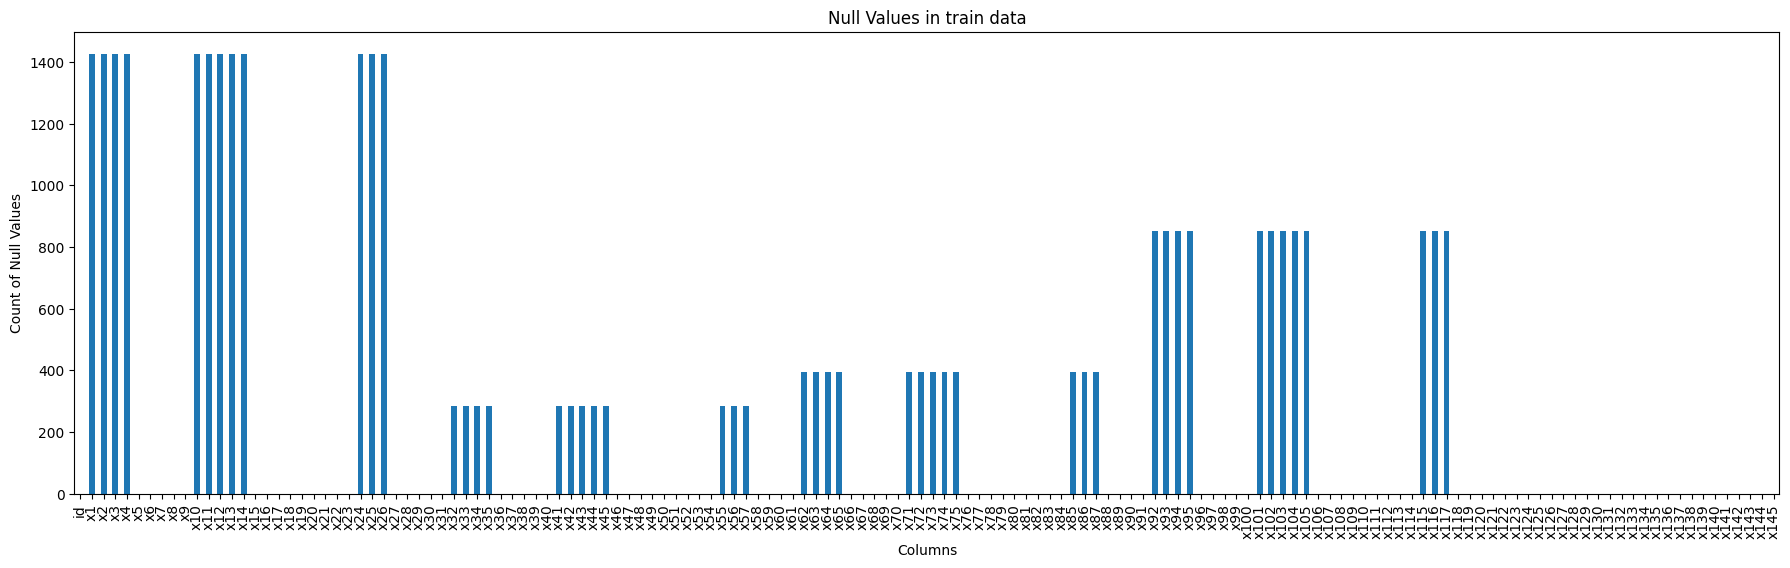

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#-----------------------------------------------------
#Null values plot
train_data_null_values = df_train.isna().sum()
plt.figure(figsize=(22, 6))
train_data_null_values .plot(kind='bar')
plt.title('Null Values in train data')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=90)
plt.show()

Test Data:

In [11]:
#Checking for duplicates
print("1. Duplicated Rows in test data:",df_test.duplicated().sum())
#--------------------------------------------------------------------
#Checking for NaN values
print("2. Null Values in test data:")
pd.DataFrame(df_test.isna().sum()).T

1. Duplicated Rows in test data: 0
2. Null Values in test data:


id   x1   x2   x3   x4  x5  x6  x7  x8  x9  x10  x11  x12  x13  x14  x15  \
0   0  294  294  294  294   0   0   0   0   0  294  294  294  294  294    0   

   x16  x17  x18  x19  x20  x21  x22  x23  x24  x25  x26  x27  x28  x29  x30  \
0    0    0    0    0    0    0    0    0  294  294  294    0    0    0    0   

   x31  x32  x33  x34  x35  x36  x37  x38  x39  x40  x41  x42  x43  x44  x45  \
0    0   73   73   73   73    0    0    0    0    0   73   73   73   73   73   

   x46  x47  x48  x49  x50  x51  x52  x53  x54  x55  x56  x57  x58  x59  x60  \
0    0    0    0    0    0    0    0    0    0   73   73   73    0    0    0   

   x61  x62  x63  x64  x65  x66  x67  x68  x69  x70  x71  x72  x73  x74  x75  \
0    0   81   81   81   81    0    0    0    0    0   81   81   81   81   81   

   x76  x77  x78  x79  x80  x81  x82  x83  x84  x85  x86  x87  x88  x89  x90  \
0    0    0    0    0    0    0    0    0    0   81   81   81    0    0    0   

   x91  x92  x93  x94  x95  x96  x97  x98  x99  x100  x101  x102  x103  x104  \
0    0  172  172  172  172    0    0    0    0     0   172   172   172   172   

   x105  x106  x107  x108  x109  x110  x111  x112  x113  x114  x115  x116  \
0   172     0     0     0     0     0     0     0     0     0   172   172   

   x117  x118  x119  x120  x121  x122  x123  x124  x125  x126  x127  x128  \
0   172     0     0     0     0     0     0     0     0     0     0     0   

   x129  x130  x131  x132  x133  x134  x135  x136  x137  x138  x139  x140  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x141  x142  x143  x144  x145  
0     0     0     0     0     0

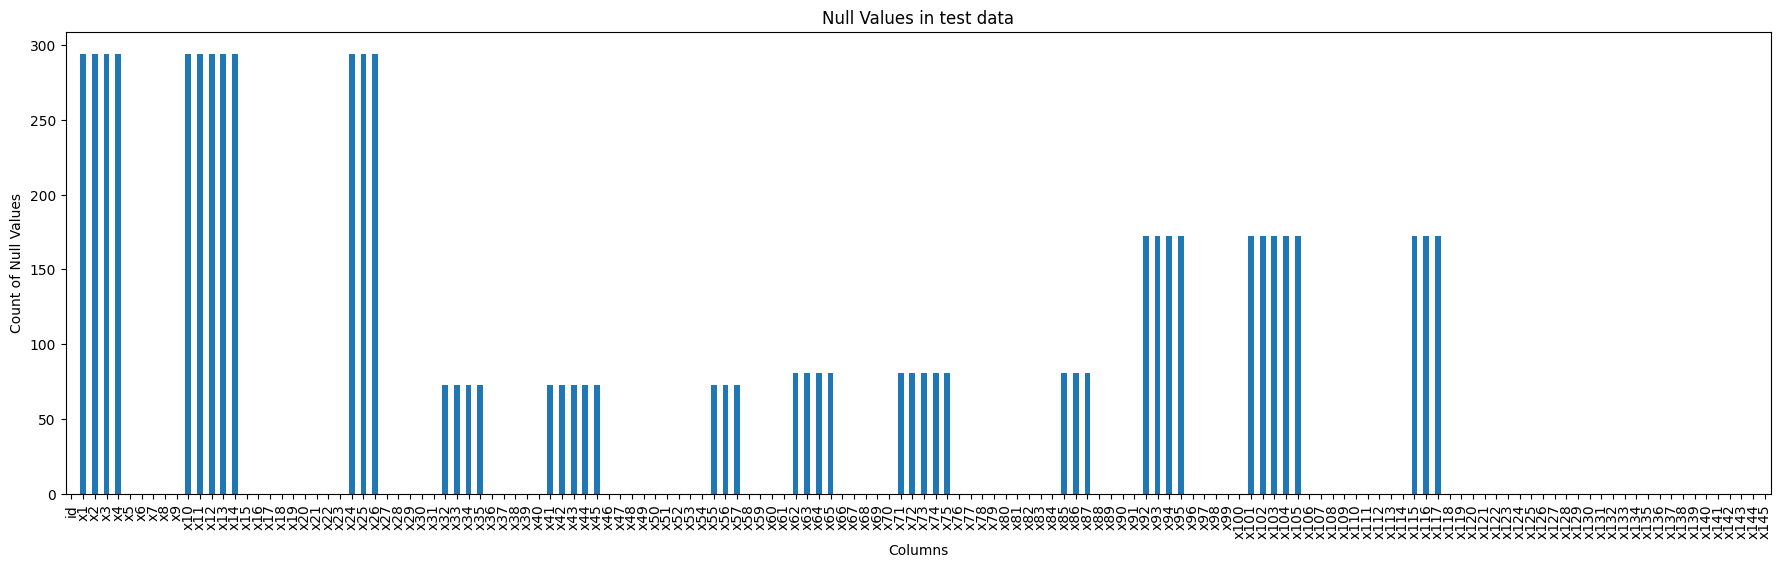

In [12]:
#Null values plot
test_data_null_values = df_test.isna().sum()
plt.figure(figsize=(22, 6))
test_data_null_values .plot(kind='bar')
plt.title('Null Values in test data')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=90)
plt.show()



#### __1.3 Filtering Numerical, Categorical and Text Columns :__

In [13]:
info = pd.DataFrame( {"Column": df_train.columns,"Data Type": df_train.dtypes,})
info.T

id      x1      x2      x3      x4       x5       x6       x7  \
Column        id      x1      x2      x3      x4       x5       x6       x7   
Data Type  int64  object  object  object  object  float64  float64  float64   

                x8       x9     x10     x11     x12     x13     x14    x15  \
Column          x8       x9     x10     x11     x12     x13     x14    x15   
Data Type  float64  float64  object  object  object  object  object  int64   

               x16    x17    x18      x19      x20      x21    x22    x23  \
Column         x16    x17    x18      x19      x20      x21    x22    x23   
Data Type  float64  int64  int64  float64  float64  float64  int64  int64   

              x24     x25     x26    x27      x28      x29     x30     x31  \
Column        x24     x25     x26    x27      x28      x29     x30     x31   
Data Type  object  object  object  int64  float64  float64  object  object   

              x32     x33     x34     x35      x36      x37      x38      x39  \
Column        x32     x33     x34     x35      x36      x37      x38      x39   
Data Type  object  object  object  object  float64  float64  float64  float64   

               x40     x41     x42     x43     x44     x45    x46      x47  \
Column         x40     x41     x42     x43     x44     x45    x46      x47   
Data Type  float64  object  object  object  object  object  int64  float64   

             x48    x49      x50      x51      x52    x53    x54     x55  \
Column       x48    x49      x50      x51      x52    x53    x54     x55   
Data Type  int64  int64  float64  float64  float64  int64  int64  object   

              x56     x57    x58      x59      x60     x61     x62     x63  \
Column        x56     x57    x58      x59      x60     x61     x62     x63   
Data Type  object  object  int64  float64  float64  object  object  object   

              x64     x65      x66      x67      x68      x69      x70  \
Column        x64     x65      x66      x67      x68      x69      x70   
Data Type  object  object  float64  float64  float64  float64  float64   

              x71     x72     x73     x74     x75    x76      x77    x78  \
Column        x71     x72     x73     x74     x75    x76      x77    x78   
Data Type  object  object  object  object  object  int64  float64  int64   

             x79      x80      x81      x82    x83    x84     x85     x86  \
Column       x79      x80      x81      x82    x83    x84     x85     x86   
Data Type  int64  float64  float64  float64  int64  int64  object  object   

              x87    x88      x89      x90     x91     x92     x93     x94  \
Column        x87    x88      x89      x90     x91     x92     x93     x94   
Data Type  object  int64  float64  float64  object  object  object  object   

              x95      x96      x97      x98      x99     x100    x101  \
Column        x95      x96      x97      x98      x99     x100    x101   
Data Type  object  float64  float64  float64  float64  float64  object   

             x102    x103    x104    x105   x106     x107   x108   x109  \
Column       x102    x103    x104    x105   x106     x107   x108   x109   
Data Type  object  object  object  object  int64  float64  int64  int64   

              x110     x111     x112   x113   x114    x115    x116    x117  \
Column        x110     x111     x112   x113   x114    x115    x116    x117   
Data Type  float64  float64  float64  int64  int64  object  object  object   

            x118     x119     x120     x121     x122     x123     x124  \
Column      x118     x119     x120     x121     x122     x123     x124   
Data Type  int64  float64  float64  float64  float64  float64  float64   

              x125    x126    x127    x128    x129    x130   x131     x132  \
Column        x125    x126    x127    x128    x129    x130   x131     x132   
Data Type  float64  object  object  object  object  object  int64  float64   

            x133   x134     x135     x136     x137   x138   x139    x1

Numerical Columns:

In [14]:
#Numerical columns
numerical_columns= df_train.select_dtypes(include=['int', 'float']).columns
print("Number of Numerical columns:", len(numerical_columns))
print(numerical_columns.tolist())

Number of Numerical columns: 86
['id', 'x5', 'x6', 'x7', 'x8', 'x9', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x27', 'x28', 'x29', 'x36', 'x37', 'x38', 'x39', 'x40', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x58', 'x59', 'x60', 'x66', 'x67', 'x68', 'x69', 'x70', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x88', 'x89', 'x90', 'x96', 'x97', 'x98', 'x99', 'x100', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x131', 'x132', 'x133', 'x134', 'x135', 'x136', 'x137', 'x138', 'x139', 'x143', 'x144', 'x145']


Categorical And Text Columns:

In [15]:
#Function for filtering categorical and text columns
def cat_text_columns(data):
    categorical_columns = []
    text_columns = []
    #-------------------------------------------------------
    for col in data.columns:
        unique_values = data[col].dropna().unique()
        if len(unique_values) == 2 and 'NO' in unique_values and 'YES' in unique_values:
            categorical_columns.append(col)
        elif data[col].dtype == 'object':
            text_columns.append(col)
    return categorical_columns, text_columns
#-------------------------------------------------------
categorical_columns, text_columns= cat_text_columns(df_train)

In [16]:
#Categorical columns
print("Number of Categorical columns:", len(categorical_columns))
print(categorical_columns)

Number of Categorical columns: 50
['x1', 'x2', 'x10', 'x11', 'x12', 'x13', 'x14', 'x24', 'x25', 'x26', 'x30', 'x31', 'x32', 'x33', 'x41', 'x42', 'x43', 'x44', 'x45', 'x55', 'x56', 'x57', 'x62', 'x63', 'x71', 'x72', 'x73', 'x74', 'x75', 'x85', 'x86', 'x87', 'x92', 'x93', 'x101', 'x102', 'x103', 'x104', 'x105', 'x115', 'x116', 'x117', 'x126', 'x127', 'x128', 'x129', 'x130', 'x140', 'x141', 'x142']


In [17]:
#Text columns
print("Number of Text columns:", len(text_columns))
print(text_columns)

Number of Text columns: 10
['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']


#### __1.4 Imputating Missing Values:__

In [18]:
#Importing dependencies
from sklearn.impute import SimpleImputer

__Numerical Columns:__

In [19]:
print("Null Values in train data numerical columns:")
pd.DataFrame(df_train[numerical_columns].isna().sum()).T

Null Values in train data numerical columns:


id  x5  x6  x7  x8  x9  x15  x16  x17  x18  x19  x20  x21  x22  x23  x27  \
0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0   

   x28  x29  x36  x37  x38  x39  x40  x46  x47  x48  x49  x50  x51  x52  x53  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x54  x58  x59  x60  x66  x67  x68  x69  x70  x76  x77  x78  x79  x80  x81  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x82  x83  x84  x88  x89  x90  x96  x97  x98  x99  x100  x106  x107  x108  \
0    0    0    0    0    0    0    0    0    0    0     0     0     0     0   

   x109  x110  x111  x112  x113  x114  x118  x119  x120  x121  x122  x123  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x124  x125  x131  x132  x133  x134  x135  x136  x137  x138  x139  x143  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x144  x145  
0     0     0

In [20]:
print("Null Values in test data numerical columns:")
pd.DataFrame(df_test[numerical_columns].isna().sum()).T

Null Values in test data numerical columns:


id  x5  x6  x7  x8  x9  x15  x16  x17  x18  x19  x20  x21  x22  x23  x27  \
0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0   

   x28  x29  x36  x37  x38  x39  x40  x46  x47  x48  x49  x50  x51  x52  x53  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x54  x58  x59  x60  x66  x67  x68  x69  x70  x76  x77  x78  x79  x80  x81  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x82  x83  x84  x88  x89  x90  x96  x97  x98  x99  x100  x106  x107  x108  \
0    0    0    0    0    0    0    0    0    0    0     0     0     0     0   

   x109  x110  x111  x112  x113  x114  x118  x119  x120  x121  x122  x123  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x124  x125  x131  x132  x133  x134  x135  x136  x137  x138  x139  x143  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x144  x145  
0     0     0

In [21]:
for i,column in enumerate(numerical_columns):
    print(f'{i+1}.{column}')
    print(df_train[column].value_counts(dropna=False).to_dict())
    print("-"*50)

1.id
{1: 1, 6670: 1, 6663: 1, 6664: 1, 6665: 1, 6666: 1, 6667: 1, 6668: 1, 6669: 1, 6671: 1, 6661: 1, 6672: 1, 6673: 1, 6674: 1, 6675: 1, 6676: 1, 6677: 1, 6678: 1, 6662: 1, 6660: 1, 6875: 1, 6650: 1, 6643: 1, 6644: 1, 6645: 1, 6646: 1, 6647: 1, 6648: 1, 6649: 1, 6651: 1, 6659: 1, 6652: 1, 6653: 1, 6654: 1, 6655: 1, 6656: 1, 6657: 1, 6658: 1, 6679: 1, 6680: 1, 6681: 1, 6709: 1, 6702: 1, 6703: 1, 6704: 1, 6705: 1, 6706: 1, 6707: 1, 6708: 1, 6710: 1, 6682: 1, 6711: 1, 6712: 1, 6713: 1, 6714: 1, 6715: 1, 6716: 1, 6717: 1, 6701: 1, 6700: 1, 6699: 1, 6698: 1, 6683: 1, 6684: 1, 6685: 1, 6686: 1, 6687: 1, 6688: 1, 6689: 1, 6690: 1, 6691: 1, 6692: 1, 6693: 1, 6694: 1, 6695: 1, 6696: 1, 6697: 1, 6642: 1, 6641: 1, 6640: 1, 6591: 1, 6584: 1, 6585: 1, 6586: 1, 6587: 1, 6588: 1, 6589: 1, 6590: 1, 6592: 1, 6601: 1, 6593: 1, 6594: 1, 6595: 1, 6596: 1, 6597: 1, 6598: 1, 6599: 1, 6583: 1, 6582: 1, 6581: 1, 6580: 1, 6565: 1, 6566: 1, 6567: 1, 6568: 1, 6569: 1, 6570: 1, 6571: 1, 6572: 1, 6573: 1, 6574: 1

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Obervation:__


- There are no missing values in the numerical columns in both the train and test datasets. However, some columns contain zero (0) values, which might be irrelevant. For now, we'll leave the zero entries as they are and proceed with the further processing.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Categorical Columns:__
- Filling  the Missing Values with the most frequent class

In [22]:
print("Null Values in train data categorical columns:")
pd.DataFrame(df_train[categorical_columns].isna().sum()).T

Null Values in train data categorical columns:


x1    x2   x10   x11   x12   x13   x14   x24   x25   x26  x30  x31  x32  \
0  1426  1426  1426  1426  1426  1426  1426  1426  1426  1426    0    0  284   

   x33  x41  x42  x43  x44  x45  x55  x56  x57  x62  x63  x71  x72  x73  x74  \
0  284  284  284  284  284  284  284  284  284  396  396  396  396  396  396   

   x75  x85  x86  x87  x92  x93  x101  x102  x103  x104  x105  x115  x116  \
0  396  396  396  396  851  851   851   851   851   851   851   851   851   

   x117  x126  x127  x128  x129  x130  x140  x141  x142  
0   851     0     0     0     0     0     0     0     0

In [23]:
print("Null Values in test data categorical columns:")
pd.DataFrame(df_test[categorical_columns].isna().sum()).T

Null Values in test data categorical columns:


x1   x2  x10  x11  x12  x13  x14  x24  x25  x26  x30  x31  x32  x33  x41  \
0  294  294  294  294  294  294  294  294  294  294    0    0   73   73   73   

   x42  x43  x44  x45  x55  x56  x57  x62  x63  x71  x72  x73  x74  x75  x85  \
0   73   73   73   73   73   73   73   81   81   81   81   81   81   81   81   

   x86  x87  x92  x93  x101  x102  x103  x104  x105  x115  x116  x117  x126  \
0   81   81  172  172   172   172   172   172   172   172   172   172     0   

   x127  x128  x129  x130  x140  x141  x142  
0     0     0     0     0     0     0     0

In [24]:
#Value counts
for i,column in enumerate(categorical_columns):
    print(f'{i+1}.{column}')
    print(df_train[column].value_counts(dropna=False).to_dict())
    print("-"*50)

1.x1
{'NO': 7729, nan: 1426, 'YES': 844}
--------------------------------------------------
2.x2
{'NO': 8048, nan: 1426, 'YES': 525}
--------------------------------------------------
3.x10
{'NO': 5343, 'YES': 3230, nan: 1426}
--------------------------------------------------
4.x11
{'NO': 8375, nan: 1426, 'YES': 198}
--------------------------------------------------
5.x12
{'NO': 5466, 'YES': 3107, nan: 1426}
--------------------------------------------------
6.x13
{'NO': 8343, nan: 1426, 'YES': 230}
--------------------------------------------------
7.x14
{'NO': 7373, nan: 1426, 'YES': 1200}
--------------------------------------------------
8.x24
{'NO': 5396, 'YES': 3177, nan: 1426}
--------------------------------------------------
9.x25
{'NO': 8480, nan: 1426, 'YES': 93}
--------------------------------------------------
10.x26
{'NO': 5386, 'YES': 3187, nan: 1426}
--------------------------------------------------
11.x30
{'NO': 9229, 'YES': 770}
-----------------------------------

In [25]:
#For simplicity filling  the missing values with the most frequent class
#---------------------------------------------------------------------------------------------
categorical_imputer=SimpleImputer(strategy='most_frequent')
#---------------------------------------------------------------------------------------------
#Train data imputation
categorical_imputer.fit(df_train[categorical_columns])
df_train[categorical_columns]=categorical_imputer.transform(df_train[categorical_columns])
#---------------------------------------------------------------------------------------------
#Test data imputation
categorical_imputer.fit(df_test[categorical_columns])
df_test[categorical_columns]=categorical_imputer.transform(df_test[categorical_columns])

__Text Columns:__
- Filling the Missing Values with " " (white space)

In [26]:
print("Null Values in train data text columns:")
pd.DataFrame(df_train[text_columns].isna().sum()).T

Null Values in train data text columns:


x3    x4  x34  x35  x61  x64  x65  x91  x94  x95
0  1426  1426  284  284    0  396  396    0  851  851

In [27]:
print("Null Values in test data text columns:")
pd.DataFrame(df_test[text_columns].isna().sum()).T

Null Values in test data text columns:


x3   x4  x34  x35  x61  x64  x65  x91  x94  x95
0  294  294   73   73    0   81   81    0  172  172

In [28]:
#Imputing the missing values with " " (white space)
#---------------------------------------------------------
#Train data imputation
df_train[text_columns]=df_train[text_columns].fillna('')
#---------------------------------------------------------
#Train data imputation
df_test[text_columns]=df_test[text_columns].fillna('')

In [29]:
#Checking for NaN values
print("Null Values in train data after imputation:")
pd.DataFrame(df_train.isna().sum()).T

Null Values in train data after imputation:


id  x1  x2  x3  x4  x5  x6  x7  x8  x9  x10  x11  x12  x13  x14  x15  x16  \
0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   

   x17  x18  x19  x20  x21  x22  x23  x24  x25  x26  x27  x28  x29  x30  x31  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x32  x33  x34  x35  x36  x37  x38  x39  x40  x41  x42  x43  x44  x45  x46  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x47  x48  x49  x50  x51  x52  x53  x54  x55  x56  x57  x58  x59  x60  x61  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x62  x63  x64  x65  x66  x67  x68  x69  x70  x71  x72  x73  x74  x75  x76  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x77  x78  x79  x80  x81  x82  x83  x84  x85  x86  x87  x88  x89  x90  x91  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x92  x93  x94  x95  x96  x97  x98  x99  x100  x101  x102  x103  x104  x105  \
0    0    0    0    0    0    0    0    0     0     0     0     0     0     0   

   x106  x107  x108  x109  x110  x111  x112  x113  x114  x115  x116  x117  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x118  x119  x120  x121  x122  x123  x124  x125  x126  x127  x128  x129  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x130  x131  x132  x133  x134  x135  x136  x137  x138  x139  x140  x141  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x142  x143  x144  x145  
0     0     0     0     0

In [30]:
#Checking for Null Values after imputation
print("Null Values in test data after imputation:")
pd.DataFrame(df_test.isna().sum()).T

Null Values in test data after imputation:


id  x1  x2  x3  x4  x5  x6  x7  x8  x9  x10  x11  x12  x13  x14  x15  x16  \
0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   

   x17  x18  x19  x20  x21  x22  x23  x24  x25  x26  x27  x28  x29  x30  x31  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x32  x33  x34  x35  x36  x37  x38  x39  x40  x41  x42  x43  x44  x45  x46  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x47  x48  x49  x50  x51  x52  x53  x54  x55  x56  x57  x58  x59  x60  x61  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x62  x63  x64  x65  x66  x67  x68  x69  x70  x71  x72  x73  x74  x75  x76  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x77  x78  x79  x80  x81  x82  x83  x84  x85  x86  x87  x88  x89  x90  x91  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   x92  x93  x94  x95  x96  x97  x98  x99  x100  x101  x102  x103  x104  x105  \
0    0    0    0    0    0    0    0    0     0     0     0     0     0     0   

   x106  x107  x108  x109  x110  x111  x112  x113  x114  x115  x116  x117  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x118  x119  x120  x121  x122  x123  x124  x125  x126  x127  x128  x129  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x130  x131  x132  x133  x134  x135  x136  x137  x138  x139  x140  x141  \
0     0     0     0     0     0     0     0     0     0     0     0     0   

   x142  x143  x144  x145  
0     0     0     0     0

## __3. Data Encoding:__

### __3.1 Encoding Categorical Columns:__

Encoding Train Data:

In [31]:
#Label Encoding the categorical columns 
#Train data
df_train_cat_encoded=df_train[categorical_columns]
for column in categorical_columns:
    df_train_cat_encoded[column] = df_train_cat_encoded[column].replace({"YES": 1, "NO": 0}).astype(int)
df_train_cat_encoded.head(2)

x1  x2  x10  x11  x12  x13  x14  x24  x25  x26  x30  x31  x32  x33  x41  \
0   0   0    1    0    0    0    0    1    0    1    0    0    0    0    1   
1   0   0    0    0    0    0    0    0    0    0    0    0    0    0    1   

   x42  x43  x44  x45  x55  x56  x57  x62  x63  x71  x72  x73  x74  x75  x85  \
0    0    1    0    0    1    0    1    0    0    1    0    0    0    0    1   
1    0    0    0    0    1    0    1    0    0    1    0    0    0    0    1   

   x86  x87  x92  x93  x101  x102  x103  x104  x105  x115  x116  x117  x126  \
0    0    1    0    0     1     0     0     0     0     1     0     1     1   
1    0    1    0    0     0     0     0     0     0     0     0     0     1   

   x127  x128  x129  x130  x140  x141  x142  
0     0     0     0     0     1     0     1  
1     0     0     0     0     1     0     1

Encoding Test Data:

In [32]:
#Label Encoding the categorical columns 
#Train data
df_test_cat_encoded=df_test[categorical_columns]
for column in categorical_columns:
    df_test_cat_encoded[column] = df_test_cat_encoded[column].replace({"YES": 1, "NO": 0}).astype(int)
df_test_cat_encoded.head(2)

x1  x2  x10  x11  x12  x13  x14  x24  x25  x26  x30  x31  x32  x33  x41  \
0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1   0   0    1    0    0    0    0    1    0    1    0    0    0    0    0   

   x42  x43  x44  x45  x55  x56  x57  x62  x63  x71  x72  x73  x74  x75  x85  \
0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
1    0    1    0    0    0    0    0    0    0    1    0    0    0    0    1   

   x86  x87  x92  x93  x101  x102  x103  x104  x105  x115  x116  x117  x126  \
0    0    0    0    0     0     0     0     0     0     0     0     0     0   
1    0    1    0    0     1     0     0     0     0     1     0     1     1   

   x127  x128  x129  x130  x140  x141  x142  
0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0

## __4. Hashing The Text Columns:__


_Hashing is a process of converting input data (such as a string or any other data type) into a fixed-size string of bytes. This output, known as a hash value or hash code, is typically a unique representation of the input data. Hashing is commonly used in various computer science applications, including data retrieval, cryptography, and data integrity verification._


_Employing the Hash field value in machine learning entails utilizing hashing techniques to convert categorical variables into numerical representations. This approach is particularly advantageous for managing high-cardinality categorical features, where the number of unique categories is significant. Rather than resorting to conventional encoding methods like one-hot encoding, which can result in high-dimensional and sparse feature spaces, hashing techniques streamline the process by mapping each category to a fixed-size space through a hash function._

Here's a step-by-step guide on how to leverage the Hash field value in machine learning:

1. **Feature Identification:** _Identify the categorical variables in your dataset that you want to use as features for your machine learning model._

2. **Hashing:** _Apply a hashing function to these categorical variables to transform them into numerical representations. Common hashing functions include Python's built-in hash() function or specialized hash functions provided by libraries like scikit-learn._

3. **Dimensionality Reduction:** _The hashing technique inherently reduces the dimensionality of the feature space by mapping categorical variables to a fixed-size space. This can be advantageous for models dealing with high-dimensional data or when memory efficiency is a concern._

4. **Model Training:** _Use the hashed features as input for training your machine learning model. Choose algorithms such as decision trees, random forests, gradient boosting, or neural networks based on your specific task and dataset._

5. **Evaluation and Tuning:** _Evaluate the performance of your model using appropriate metrics and techniques like cross-validation. Fine-tune hyperparameters and explore different hashing techniques to optimize model performance._

6. **Inference:** _Once your model is trained and validated, employ it to make predictions on new data. Ensure consistent application of the hashing technique used during training for proper feature transformation._

7. **Monitoring and Maintenance:** _Continuously monitor the model's performance and update it as needed with new data or changes in the underlying distribution. Periodic retraining with updated data helps maintain accuracy and relevance._

_With the help of Hash field value in machine learning, you can effectively manage high-cardinality categorical features and enhance the efficiency and effectiveness of your models. However, it's crucial to understand the trade-offs involved, such as potential hash collisions and loss of interpretability, and carefully evaluate the impact of hashing on your specific task and dataset._


#### __4.1 Filtering Text Columns:__


In [33]:
#Creating a new data frame contains only text columns
#Train data
df_train_text=df_train[text_columns]
df_train_text.head(2)

x3  \
0  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
1                                                 

                                             x4  \
0  GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=   
1                                                 

                                            x34  \
0  mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=   
1  l0G2rvmLGE6mpPtAibFsoW/0SiNnAuyAc4k35TrHvoQ=   

                                            x35  \
0  s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=   
1  lblNNeOLanWhqgISofUngPYP0Ne1yQv3QeNHqCAoh48=   

                                            x61  \
0  +2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=   
1  MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=   

                                            x64  \
0  Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=   
1  TqL9cs8ZFzALzVpZv6wYBDi+6zwhrdarQE/3FH+XAlA=   

                                            x65  \
0  GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=   
1  aZTF/lredyP4cukeN8bh6kpBjYmS1QFNpPOg2LVm3Lg=   

                                            x91  \
0  bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=   
1  YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=   

                                            x94  \
0  +dia7tCOijlRGbABX0YKG5L85x/hXLyJwwplN5Qab04=   
1  dsyhxXKNNJy4WVGD/v4+UGyW3jHWkx2xTdg3STsf34A=   

                                            x95  
0  f4Uu1R9nnf/h03aqiRQT0Fw3WItzNToLCyRlW1Pn8Z8=  
1  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=

In [34]:
#Test data
df_test_text=df_test[text_columns]
df_test_text.head(2)

x3  \
0  5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                             x4  \
0  FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=   

                                            x34  \
0  rkfeWAP0Q1zsdn6lMJMLNghvsCa1rgbNDCSjW9SQhSg=   
1  cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=   

                                            x35  \
0  N4siEIHjmpqO0+7xIloDRju9XNdtjkzdfWUo4rBLYhc=   
1  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=   

                                            x61  \
0  PrEvffTOaU/EQzH67SC94Xdz0Y/HKUjZzaRoh1CnRm8=   
1  6Wv/YGbS0KDFv2UrATvlJcVtCjJOgnVQzWuuF5Ltv2k=   

                                            x64  \
0  RxUzVvqZo40kN7065ZcLrk8so8ZQCcoUoSNWMZo1+EY=   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            x65  \
0  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=   

                                            x91  \
0  2Y4EGKrRgHpO6rMmxhFTTj71p+jvsblepe/APAM9nkU=   
1  dBSc/QZM58O6miC4ULLhY0C4S6WIZLwy2oERlRo7Iaw=   

                                            x94  \
0                                                 
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            x95  
0                                                
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=

#### __4.2 Applying Hashing:__

__Hashing with hash() function:__

_We can use the built-in Python hash() function to generate a hash value for each element in a DataFrame. However, this method might not be suitable for all cases, especially when dealing with non-hashable types._

In [35]:
for column in text_columns:
        df_train_text['hashed_'+column] = df_train_text[column].apply(hash)
        df_test_text['hashed_'+column] = df_test_text[column].apply(hash)

In [36]:
df_train_text.head()

x3  \
0  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
1                                                 
2  ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=   
3  BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=   
4  RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=   

                                             x4  \
0  GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=   
1                                                 
2  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=   
3  YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=   
4  3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=   

                                            x34  \
0  mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=   
1  l0G2rvmLGE6mpPtAibFsoW/0SiNnAuyAc4k35TrHvoQ=   
2  9TRXThP/ifDpJRGFX1LQseibUA1NJ3XM53gy+1eZ46k=   
3  BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=   
4  XEDyQD4da6aJkZiBf+r7LD2VdhLGnCMsSpuRFUyCZgg=   

                                            x35  \
0  s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=   
1  lblNNeOLanWhqgISofUngPYP0Ne1yQv3QeNHqCAoh48=   
2  XSJ6E8aAoZC7/KAu3eETpfMg3mCq7HVBFIVIsoMKh9E=   
3  YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=   
4  Co/nVSLofrWsM5qpcKLXfekegArokgN29XjEXttuXK4=   

                                            x61  \
0  +2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=   
1  MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=   
2  cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=   
3  XQG0f+jmjLI0UHAXXH2RYL4MEHa+yd9okO+730PCZuc=   
4  wIHg6aGH2GMPX6l1pCTzeS1bXE4jxRqmd9ubES4HgW8=   

                                            x64  \
0  Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=   
1  TqL9cs8ZFzALzVpZv6wYBDi+6zwhrdarQE/3FH+XAlA=   
2  oFsUwSLCWcj8UA1cqILh5afKVcvwlFA+ohJ147Wkz5I=   
3  /1yAAEg6Qib4GMD+wvGOlGmpCIPIAzioWtcCwbns9/I=   
4  ST8+q2Jgb91pWEwLwmSoJzXEGsQKeQGbzlLbgHPtj4w=   

                                            x65  \
0  GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=   
1  aZTF/lredyP4cukeN8bh6kpBjYmS1QFNpPOg2LVm3Lg=   
2  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=   
3  YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=   
4  rB07AAHPffU4zFFF8IrqfKSltyWcPyy4+q+IM5SLZiQ=   

                                            x91  \
0  bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=   
1  YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=   
2  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=   
3  Vl+TDNSupucNoI+Fqeo7bMCkxg1hRjgTSS6NYb9BW00=   
4  WYQEP5EEzM+P+nfkHKLkGko/S3RdBgfEQ3IcyYwrChE=   

                                            x94  \
0  +dia7tCOijlRGbABX0YKG5L85x/hXLyJwwplN5Qab04=   
1  dsyhxXKNNJy4WVGD/v4+UGyW3jHWkx2xTdg3STsf34A=   
2  mRPnGiKVOWTk/vzZaqlLXZRtdrkcQ/sX0hqBCqOuKq0=   
3  /1yAAEg6Qib4GMD+wvGOlGmpCIPIAzioWtcCwbns9/I=   
4  fylJzYvYlM0+kRBeLB3eFKKgCibqxFvBa8hL+WStwCE=   

                                            x95            hashed_x3  \
0  f4Uu1R9nnf/h03aqiRQT0Fw3WItzNToLCyRlW1Pn8Z8= -3749242746312196353   
1  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=                    0   
2  oo9tGpHvTredpg9JkHgYbZAuxcwtSpQxU5mA/zUbxY8=  1703747094745282940   
3  YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=  1522243699709059183   
4  IoM2E9pNxABFR+H3yfapUL+ThKm7GtTzY7js9H/H99o= -4186266831451320010   

             hashed_x4           hashed_x34           hashed_x35  \
0  7855485786571187182 -1114159404931072774 -6083429591697110582   
1                    0 -2254372493466754001 -7745014413958619817   
2 -4656054552574332714   262719043844191002  4708677919737318299   
3   640671306805728268  1522243699709059183   640671306805728268   
4  4924141431182443918 -4994279265997137966 -1888314894881401036   

            hashed_x61           hashed_x64           hashed_x65  \
0  5615120558026581836  3265988861345557640  5234105236160329576   
1  8578171792512949810 -1511393748296018792 -6464289398481041656   
2  4359081805674030556 -5686257773140879572 -1245305677487174315   
3 -6316228158375452383 -2188840064278864621   640671306805728268   
4 -5930193011105023262 -5726812334035515135 -4346911236332766846   

            hashed_x91         

## __5. Machine Learning:__

#### __5.1 Data Preparation:__

__Combining Train Data Feature Variables and Train Data Labels:__

In [37]:
df_merged= pd.merge(df_train, df_train_labels, on='id', how='inner') 
print("Shape of merged dataframe:",df_merged.shape)
df_merged.head(2)

Shape of merged dataframe: (9999, 179)


id  x1  x2                                            x3  \
0   1  NO  NO  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
1   2  NO  NO                                                 

                                             x4        x5        x6        x7  \
0  GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=  0.576561  0.073139  0.481394   
1                                                0.000000  0.000000  0.000000   

         x8        x9  x10 x11 x12 x13 x14  x15       x16  x17  x18       x19  \
0  0.115697  0.472474  YES  NO  NO  NO  NO   42  0.396065    3    6  0.991018   
1  0.000000  0.000000   NO  NO  NO  NO  NO    0  0.000000    0    0  0.000000   

   x20   x21   x22   x23  x24 x25  x26  x27       x28      x29 x30 x31 x32  \
0  0.0  0.82  3306  4676  YES  NO  YES    0  0.405047  0.46461  NO  NO  NO   
1  0.0  0.00     0     0   NO  NO   NO    0  0.000000  0.00000  NO  NO  NO   

  x33                                           x34  \
0  NO  mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=   
1  NO  l0G2rvmLGE6mpPtAibFsoW/0SiNnAuyAc4k35TrHvoQ=   

                                            x35       x36       x37       x38  \
0  s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=  0.576561  0.073139  0.481394   
1  lblNNeOLanWhqgISofUngPYP0Ne1yQv3QeNHqCAoh48=  1.058379  0.125832  0.932547   

        x39       x40  x41 x42  x43 x44 x45  x46       x47  x48  x49  \
0  0.115697  0.458560  YES  NO  YES  NO  NO    9  0.368263    2   10   
1  0.663037  0.569047  YES  NO   NO  NO  NO    9  0.709921    5    6   

        x50  x51   x52   x53   x54  x55 x56  x57  x58       x59       x60  \
0  0.992729  0.0  0.94  3306  4676  YES  NO  YES    1  0.375535  0.451301   
1  0.968240  0.0  0.81  4678  3306  YES  NO  YES    3  0.741682  0.560282   

                                            x61 x62 x63  \
0  +2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=  NO  NO   
1  MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=  NO  NO   

                                            x64  \
0  Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=   
1  TqL9cs8ZFzALzVpZv6wYBDi+6zwhrdarQE/3FH+XAlA=   

                                            x65       x66       x67       x68  \
0  GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=  0.576561  0.073139  0.481394   
1  aZTF/lredyP4cukeN8bh6kpBjYmS1QFNpPOg2LVm3Lg=  1.058379  0.125832  0.932547   

        x69       x70  x71 x72 x73 x74 x75  x76       x77  x78  x79       x80  \
0  0.115697  0.487598  YES  NO  NO  NO  NO   42  0.363131    6   10  0.987596   
1  0.663037  0.628474  YES  NO  NO  NO  NO    2  0.679371    8    7  0.937387   

   x81   x82   x83   x84  x85 x86  x87  x88       x89       x90  \
0  0.0  0.71  3306  4676  YES  NO  YES    0  0.375535  0.479734   
1  0.0  0.84  4678  3306  YES  NO  YES    1  0.741984  0.619282   

                                            x91 x92 x93  \
0  bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=  NO  NO   
1  YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=  NO  NO   

                                            x94  \
0  +dia7tCOijlRGbABX0YKG5L85x/hXLyJwwplN5Qab04=   
1  dsyhxXKNNJy4WVGD/v4+UGyW3jHWkx2xTdg3STsf34A=   

                                            x95       x96       x97       x98  \
0  f4Uu1R9nnf/h03aqiRQT0Fw3WItzNToLCyRlW1Pn8Z8=  0.576561  0.073139  0.481394   
1  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  1.058379  0.125832  0.932547   

        x99      x100 x101 x102 x103 x104 x105  x106      x107  x108  x109  \
0  0.115697  0.473079  YES   NO   NO   NO   NO    37  0.333618     4     6   
1  0.663037  0.602394   NO   NO   NO   NO   NO    11  0.581367     3     6   

       x110  x111  x112  x113  x114 x115 x116 x117  x118      x119     x120  \
0  0.987169   0.0  0.89  3306  4676  YES   NO  YES     1  0.346450  0.46461   
1  0.966122   0.0  0.87  4678  3306   NO   NO   NO     3  0.615245  0.59363   

       x121      x122      x123      x124      x125 x126 x127 x128 x129 x130  \
0  0.576561  0.073139  0.481394  0.115697  0.473079  YES   NO   NO   NO   NO   


__Feature Variables:__

In [38]:
#Feature variables
hashed_df = df_train_text[['hashed_x3', 'hashed_x4', 'hashed_x34', 'hashed_x35', 
                                'hashed_x61', 'hashed_x64', 'hashed_x65', 
                                'hashed_x91', 'hashed_x94', 'hashed_x95']]

numerical_columns_df = df_merged[numerical_columns[1:]]
#---------------------------------------------------------------------------------------------
#Concatenating all Dataframes
X= pd.concat([hashed_df, df_train_cat_encoded, numerical_columns_df,], axis=1)
print("Shape of X:",X.shape)
X.head(2)

Shape of X: (9999, 145)


hashed_x3            hashed_x4           hashed_x34  \
0 -3749242746312196353  7855485786571187182 -1114159404931072774   
1                    0                    0 -2254372493466754001   

            hashed_x35           hashed_x61           hashed_x64  \
0 -6083429591697110582  5615120558026581836  3265988861345557640   
1 -7745014413958619817  8578171792512949810 -1511393748296018792   

            hashed_x65           hashed_x91           hashed_x94  \
0  5234105236160329576  4237768188120585644  4191641684903115523   
1 -6464289398481041656 -8445145315971244227 -1157370309010652015   

            hashed_x95  x1  x2  x10  x11  x12  x13  x14  x24  x25  x26  x30  \
0 -7894575371209614995   0   0    1    0    0    0    0    1    0    1    0   
1 -4656054552574332714   0   0    0    0    0    0    0    0    0    0    0   

   x31  x32  x33  x41  x42  x43  x44  x45  x55  x56  x57  x62  x63  x71  x72  \
0    0    0    0    1    0    1    0    0    1    0    1    0    0    1    0   
1    0    0    0    1    0    0    0    0    1    0    1    0    0    1    0   

   x73  x74  x75  x85  x86  x87  x92  x93  x101  x102  x103  x104  x105  x115  \
0    0    0    0    1    0    1    0    0     1     0     0     0     0     1   
1    0    0    0    1    0    1    0    0     0     0     0     0     0     0   

   x116  x117  x126  x127  x128  x129  x130  x140  x141  x142        x5  \
0     0     1     1     0     0     0     0     1     0     1  0.576561   
1     0     0     1     0     0     0     0     1     0     1  0.000000   

         x6        x7        x8        x9  x15       x16  x17  x18       x19  \
0  0.073139  0.481394  0.115697  0.472474   42  0.396065    3    6  0.991018   
1  0.000000  0.000000  0.000000  0.000000    0  0.000000    0    0  0.000000   

   x20   x21   x22   x23  x27       x28      x29       x36       x37  \
0  0.0  0.82  3306  4676    0  0.405047  0.46461  0.576561  0.073139   
1  0.0  0.00     0     0    0  0.000000  0.00000  1.058379  0.125832   

        x38       x39       x40  x46       x47  x48  x49       x50  x51   x52  \
0  0.481394  0.115697  0.458560    9  0.368263    2   10  0.992729  0.0  0.94   
1  0.932547  0.663037  0.569047    9  0.709921    5    6  0.968240  0.0  0.81   

    x53   x54  x58       x59       x60       x66       x67       x68  \
0  3306  4676    1  0.375535  0.451301  0.576561  0.073139  0.481394   
1  4678  3306    3  0.741682  0.560282  1.058379  0.125832  0.932547   

        x69       x70  x76       x77  x78  x79       x80  x81   x82   x83  \
0  0.115697  0.487598   42  0.363131    6   10  0.987596  0.0  0.71  3306   
1  0.663037  0.628474    2  0.679371    8    7  0.937387  0.0  0.84  4678   

    x84  x88       x89       x90       x96       x97       x98       x99  \
0  4676    0  0.375535  0.479734  0.576561  0.073139  0.481394  0.115697   
1  3306    1  0.741984  0.619282  1.058379  0.125832  0.932547  0.663037   

       x100  x106      x107  x108  x109      x110  x111  x112  x113  x114  \
0  0.473079    37  0.333618     4     6  0.987169   0.0  0.89  3306  4676   
1  0.602394    11  0.581367     3     6  0.966122   0.0  0.87  4678  3306   

   x118      x119     x120      x121      x122      x123      x124      x125  \
0     1  0.346450  0.46461  0.576561  0.073139  0.481394  0.115697  0.473079   
1     3  0.615245  0.59363  1.058379  0.125832  0.932547  0.663037  0.602394   

   x131      x132  x133  x134      x135  x136  x137  x138  x139  x143  \
0    42  0.363131     5     6  0.987596   0.0  0.81  3306  4676     2   
1     9  0.709921     4     6  0.968240   0.0  0.51  4678  3306     4   

       x144     x145  
0  0.375535  0.46461  
1  0.741682  0.59363

__Target Variable:__

In [39]:
#Taking only first 9999 data labels
y=df_merged.loc[:,'y1':]
print("Shape of y",y.shape)
y.head(2)

Shape of y (9999, 33)


y1  y2  y3  y4  y5  y6  y7  y8  y9  y10  y11  y12  y13  y14  y15  y16  y17  \
0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0   
1   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0   

   y18  y19  y20  y21  y22  y23  y24  y25  y26  y27  y28  y29  y30  y31  y32  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1   

   y33  
0    1  
1    0

#### __5.2 Train Test Split:__

In [40]:
#Import dependencies
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### __5.3 Normalizing the Data:__

In [42]:
#Import dependencies
from sklearn.preprocessing import MinMaxScaler

In [43]:
#Using MinMax Scaler
mms = MinMaxScaler()
#--------------------------------------------
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)
#--------------------------------------------
X_train_scaled[:1]

array([[0.49993361, 0.4984133 , 0.51484981, 0.37215468, 0.64183457,
        0.51483976, 0.37341247, 0.37333691, 0.96516471, 0.0361805 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0675173 ,
        0.98159509, 0.        , 0.        , 0.  

#### __5.2 Training The Model:__



3 Different classification models,such as


1. `Decision Tree Classifier`

2. `Random Forest Classifier`

3. `XGBoost Classifier`

are trained and checked for performance.

In [44]:
#Import dependencies
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score

In [45]:
models = {
            "Decision Tree": DecisionTreeClassifier(random_state=7),
            "Random Forest": RandomForestClassifier(random_state=7),
            "XGBoost": XGBClassifier()
         }
#------------------------------------------------------------------------------------------
metrics = []
#------------------------------------------------------------------------------------------
for name, model in models.items():
            #Model Fitting 
            model.fit(X_train_scaled, y_train)
            #-----------------------------------------------------------
            y_train_pred = model.predict(X_train_scaled)
            y_test_pred = model.predict(X_test_scaled)
            #-----------------------------------------------------------
            train_acc = accuracy_score(y_train, y_train_pred)
            test_acc = accuracy_score(y_test, y_test_pred)
            #-----------------------------------------------------------
            f1_train = f1_score(y_train, y_train_pred, average='micro')
            f1_test=f1_score(y_test, y_test_pred, average='micro')
            #-----------------------------------------------------------
            metrics.append({'Model': name, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc, 'Train F1 Score': f1_train,'Test F1 Score': f1_test})
#------------------------------------------------------------------------------------------
metrics_df = pd.DataFrame(metrics)

In [46]:
metrics_df 

Model  Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score
0  Decision Tree          1.0000          0.735        1.000000       0.752285
1  Random Forest          1.0000          0.726        1.000000       0.800786
2        XGBoost          0.9985          0.770        0.999273       0.840336

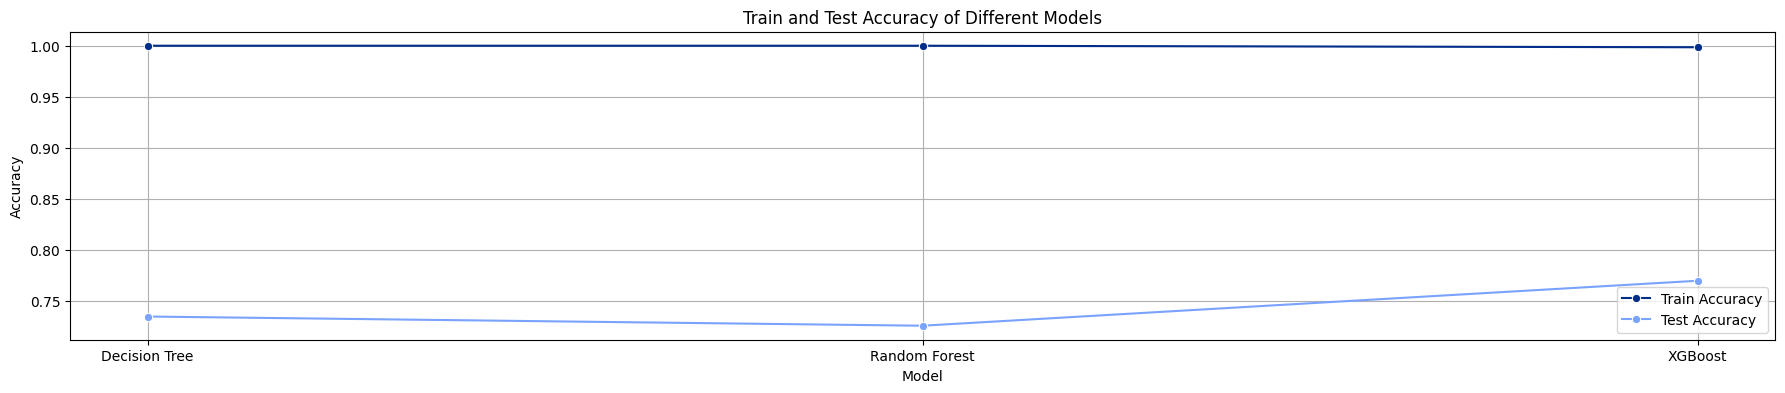

In [47]:
# Line Graph for plotting the Model vs Accuracy
plt.figure(figsize=(22 ,4))
sns.lineplot(data=metrics_df, x="Model", y='Train Accuracy', marker='o', color='#002c8a', label='Train Accuracy')
sns.lineplot(data=metrics_df, x="Model", y='Test Accuracy', marker='o', color='#79a3fc', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy of Different Models')
plt.legend()
plt.grid(True)
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __Observation:__

- Although all three models demonstrated strong performance on the training set, they exhibited poor accuracy during testing, suggesting overfitting.The low F1 score indicates potential class imbalance issues.

####  __Solution:__
 - To enhance accuracy, one approach is to ensure balanced classes for the target variables or utilize techniques like SMOTE. However, SMOTE is not directly compatible with multilabel target variables; thus, conversion into a single label format may be necessary.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

##### __Trying to Apply SMOTE (Synthetic Minority Over-sampling Technique):__

__Converting OHE Columns to Single Class:__ 

In [48]:
y_label= y.apply(lambda row: row.idxmax().replace('y', ''), axis=1).astype(int)
#--------------------------------------------------------------------------------
print("Value Counts:")
pd.DataFrame(y_label.value_counts(dropna=False).to_dict(),index=[0])

Value Counts:


33   9    6    7    32   29   3    24   30   4    10   13   26   16   28  \
0  5616  767  761  350  349  316  220  168  165  156  143  131  114  112  105   

   27  12  21  1   22  31  25  20  15  23  8   11  2   19  17  18  5   
0  90  89  68  60  49  48  32  28  27  10   6   6   6   4   1   1   1

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
__Observation:__
- We have 32 classes with varying levels of presence, applying SMOTE directly might not be the most appropriate approach due to the imbalanced nature of your dataset. SMOTE works by generating synthetic samples for minority classes to balance the class distribution. However, it might not be effective if the class distribution is highly skewed or if some classes have significantly more instances than others.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __5.3 Test Data Prediction:__

- Since sampling methods are not applicable to improve the accuracy of the model for this data .
-  we'll proceed with the original data. We'll employ a Random Forest Classifier Model to predict the targets in the test data.

__Random Forest Classifier Model:__

In [85]:
#Feature variables of testing the data after training the model
hashed_df = df_test_text[['hashed_x3', 'hashed_x4', 'hashed_x34', 'hashed_x35', 
                                'hashed_x61', 'hashed_x64', 'hashed_x65', 
                                'hashed_x91', 'hashed_x94', 'hashed_x95']]
numerical_columns_df = df_test[numerical_columns[1:]]
#---------------------------------------------------------------------------------------------
#Concatenating all Dataframes
train_data= pd.concat([hashed_df, df_test_cat_encoded, numerical_columns_df], axis=1)
print("Shape of train_data:",train_data.shape)
train_data.head(2)

Shape of train_data: (2000, 145)


hashed_x3            hashed_x4           hashed_x34  \
0  7450278916230619286  6951542657000059639  5612033362844696267   
1  9117718086825715008 -1245305677487174315  4359081805674030556   

            hashed_x35           hashed_x61           hashed_x64  \
0 -2161645699770025072  -593044547856148256  4921237661584815685   
1 -4656054552574332714  4656809273386158473  9117718086825715008   

            hashed_x65           hashed_x91           hashed_x94  \
0 -4656054552574332714  8344804940983328284                    0   
1 -1245305677487174315  5457073866714240750  9117718086825715008   

            hashed_x95  x1  x2  x10  x11  x12  x13  x14  x24  x25  x26  x30  \
0                    0   0   0    0    0    0    0    0    0    0    0    0   
1 -1245305677487174315   0   0    1    0    0    0    0    1    0    1    0   

   x31  x32  x33  x41  x42  x43  x44  x45  x55  x56  x57  x62  x63  x71  x72  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    1    0    0    0    0    0    0    0    1    0   

   x73  x74  x75  x85  x86  x87  x92  x93  x101  x102  x103  x104  x105  x115  \
0    1    0    0    0    0    0    0    0     0     0     0     0     0     0   
1    0    0    0    1    0    1    0    0     1     0     0     0     0     1   

   x116  x117  x126  x127  x128  x129  x130  x140  x141  x142        x5  \
0     0     0     0     0     0     0     0     0     0     0  1.414798   
1     0     1     1     0     0     0     0     0     0     0  0.832679   

         x6        x7        x8        x9  x15       x16  x17  x18       x19  \
0  0.000000  1.000000  0.000000  0.202060    4  0.096413   28    2  0.827354   
1  0.049834  0.945938  0.317427  0.482021    3  0.895500    6    7  0.950468   

   x20   x21   x22   x23  x27       x28       x29       x36       x37  \
0  0.0  1.00  1262   892    1  0.269058  0.193344  1.414798  0.000000   
1  0.0  0.88  4672  3311    1  0.945032  0.471747  0.832679  0.049834   

        x38       x39       x40  x46       x47  x48  x49       x50  x51   x52  \
0  1.000000  0.000000  0.190967    8  0.052691    9    4  0.942825  0.0  1.00   
1  0.945938  0.317427  0.480308    4  0.804893    3    7  0.966777  0.0  0.84   

    x53   x54  x58       x59       x60       x66       x67       x68  \
0  1262   892    0  0.109865  0.182250  1.414798  0.000000  1.000000   
1  4672  3311    3  0.838115  0.471318  0.832679  0.049834  0.945938   

        x69       x70  x76       x77  x78  x79       x80  x81   x82   x83  \
0  0.000000  0.212361    8  0.052691    3    6  0.980942  0.0  1.00  1262   
1  0.317427  0.482021    1  0.725763    6    7  0.950468  0.0  0.88  4672   

    x84  x88       x89       x90       x96       x97       x98       x99  \
0   892    0  0.071749  0.203645  0.000000  0.000000  0.000000  0.000000   
1  3311    0  0.775294  0.471747  0.832679  0.049834  0.945938  0.317427   

       x100  x106      x107  x108  x109      x110  x111  x112  x113  x114  \
0  0.000000     0  0.000000     0     0  0.000000   0.0  0.00     0     0   
1  0.482021     1  0.725763     6     7  0.950468   0.0  0.88  4672  3311   

   x118      x119      x120      x121      x122      x123      x124      x125  \
0     0  0.000000  0.000000  1.414798  0.000000  1.000000  0.000000  0.202060   
1     0  0.775294  0.471747  0.832679  0.049834  0.945938  0.317427  0.482021   

   x131      x132  x133  x134      x135  x136      x137  x138  x139  x143  \
0     8  0.052691     6     2  0.963004   0.0  1.000000  1262   892     0   
1     0  0.725763    17     7  0.876992   1.0  0.866667  4672  3311     5   

       x144      x145  
0  0.089686  0.193344  
1  0.945032  0.471318

In [86]:
rfc_model=RandomForestClassifier(random_state=7)
#-----------------------------------------------------------------
rfc_model.fit(X_train_scaled,y_train)
#-----------------------------------------------------------------
y_pred = rfc_model.predict(X_test_scaled)

In [83]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of RFC:", accuracy)
#-----------------------------------------------
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy Score of RFC: 0.726
F1 Score: 0.7792018997460166


In [77]:
#Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.45      0.62        11
           1       0.00      0.00      0.00         1
           2       0.94      0.67      0.78        43
           3       1.00      0.65      0.79        34
           4       0.00      0.00      0.00         0
           5       0.84      0.65      0.73       151
           6       0.90      0.25      0.39        72
           7       0.00      0.00      0.00         0
           8       0.88      0.58      0.70       139
           9       1.00      0.47      0.64        34
          10       0.00      0.00      0.00         3
          11       0.80      0.66      0.73       142
          12       1.00      0.45      0.62        20
          13       0.00      0.00      0.00         0
          14       1.00      0.50      0.67         6
          15       1.00      0.52      0.69        21
          16       0.00      0.00      0.00         0
   

In [87]:
#Predicting test data
predicted_output=rfc_model.predict(train_data)

__Converting the Output to Expected Format:__

In [88]:
prediction_list=[]
for i in range(len(predicted_output)):
    prediction_list.extend(predicted_output.tolist()[i])
#-----------------------------------------------------
#Dataframe of predicted outputs
df_pred=pd.DataFrame(prediction_list,columns=['pred'])
df_pred.head(2)

pred
0     0
1     0

In [89]:
target_labels_id=[]
for id in df_test.id:
    for col in range(1,34):
        target_labels_id.append(str(id)+'_y'+str(col))
#--------------------------------------------------------------
#Creating a dataframe for X_test output prediction 
df_id_label=pd.DataFrame(target_labels_id,columns=['id_label'])
df_id_label.head(2)

id_label
0  1698001_y1
1  1698001_y2

In [90]:
#Concatenating two dataframes together
df_submission=pd.concat([df_id_label,df_pred],axis=1)
#--------------------------------------------------------------------
print("Shape of the Predicted datafarme:",df_submission.shape)
df_submission.head(33).T

Shape of the Predicted datafarme: (66000, 2)


0           1           2           3           4   \
id_label  1698001_y1  1698001_y2  1698001_y3  1698001_y4  1698001_y5   
pred               0           0           0           0           0   

                  5           6           7           8            9   \
id_label  1698001_y6  1698001_y7  1698001_y8  1698001_y9  1698001_y10   
pred               0           0           0           0            0   

                   10           11           12           13           14  \
id_label  1698001_y11  1698001_y12  1698001_y13  1698001_y14  1698001_y15   
pred                0            0            0            0            0   

                   15           16           17           18           19  \
id_label  1698001_y16  1698001_y17  1698001_y18  1698001_y19  1698001_y20   
pred                0            0            0            0            0   

                   20           21           22           23           24  \
id_label  1698001_y21  1698001_y22  1698001_y23  1698001_y24  1698001_y25   
pred                0            0            0            0            0   

                   25           26           27           28           29  \
id_label  1698001_y26  1698001_y27  1698001_y28  1698001_y29  1698001_y30   
pred                0            0            0            0            0   

                   30           31           32  
id_label  1698001_y31  1698001_y32  1698001_y33  
pred                0            0            0

## __6. Saving the Predicted Output in ".csv" Format__

In [55]:
df_submission.to_csv('test_data_predictions.csv',index=None)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## __7. Natural Language Processsing (NLP):__

__7.1 Combining All The Text Columns Together To a Single Column:__

In [56]:
#Creating a new column "context" by concatenating all the text columns
#------------------------------------------------
#Train data
df_train_text['context'] = df_train_text.apply(lambda row: ' '.join(map(str, row)), axis=1)
df_train_text.head(2)

x3  \
0  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
1                                                 

                                             x4  \
0  GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=   
1                                                 

                                            x34  \
0  mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=   
1  l0G2rvmLGE6mpPtAibFsoW/0SiNnAuyAc4k35TrHvoQ=   

                                            x35  \
0  s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=   
1  lblNNeOLanWhqgISofUngPYP0Ne1yQv3QeNHqCAoh48=   

                                            x61  \
0  +2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=   
1  MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=   

                                            x64  \
0  Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=   
1  TqL9cs8ZFzALzVpZv6wYBDi+6zwhrdarQE/3FH+XAlA=   

                                            x65  \
0  GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=   
1  aZTF/lredyP4cukeN8bh6kpBjYmS1QFNpPOg2LVm3Lg=   

                                            x91  \
0  bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=   
1  YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=   

                                            x94  \
0  +dia7tCOijlRGbABX0YKG5L85x/hXLyJwwplN5Qab04=   
1  dsyhxXKNNJy4WVGD/v4+UGyW3jHWkx2xTdg3STsf34A=   

                                            x95            hashed_x3  \
0  f4Uu1R9nnf/h03aqiRQT0Fw3WItzNToLCyRlW1Pn8Z8= -3749242746312196353   
1  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=                    0   

             hashed_x4           hashed_x34           hashed_x35  \
0  7855485786571187182 -1114159404931072774 -6083429591697110582   
1                    0 -2254372493466754001 -7745014413958619817   

            hashed_x61           hashed_x64           hashed_x65  \
0  5615120558026581836  3265988861345557640  5234105236160329576   
1  8578171792512949810 -1511393748296018792 -6464289398481041656   

            hashed_x91           hashed_x94           hashed_x95  \
0  4237768188120585644  4191641684903115523 -7894575371209614995   
1 -8445145315971244227 -1157370309010652015 -4656054552574332714   

                                             context  
0  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8= G...  
1    l0G2rvmLGE6mpPtAibFsoW/0SiNnAuyAc4k35TrHvoQ=...

In [57]:
#Test data
df_test_text['context'] = df_test_text.apply(lambda row: ' '.join(map(str, row)), axis=1)
df_test_text.head(2)

x3  \
0  5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                             x4  \
0  FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=   

                                            x34  \
0  rkfeWAP0Q1zsdn6lMJMLNghvsCa1rgbNDCSjW9SQhSg=   
1  cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=   

                                            x35  \
0  N4siEIHjmpqO0+7xIloDRju9XNdtjkzdfWUo4rBLYhc=   
1  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=   

                                            x61  \
0  PrEvffTOaU/EQzH67SC94Xdz0Y/HKUjZzaRoh1CnRm8=   
1  6Wv/YGbS0KDFv2UrATvlJcVtCjJOgnVQzWuuF5Ltv2k=   

                                            x64  \
0  RxUzVvqZo40kN7065ZcLrk8so8ZQCcoUoSNWMZo1+EY=   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            x65  \
0  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=   

                                            x91  \
0  2Y4EGKrRgHpO6rMmxhFTTj71p+jvsblepe/APAM9nkU=   
1  dBSc/QZM58O6miC4ULLhY0C4S6WIZLwy2oERlRo7Iaw=   

                                            x94  \
0                                                 
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            x95            hashed_x3  \
0                                                7450278916230619286   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  9117718086825715008   

             hashed_x4           hashed_x34           hashed_x35  \
0  6951542657000059639  5612033362844696267 -2161645699770025072   
1 -1245305677487174315  4359081805674030556 -4656054552574332714   

            hashed_x61           hashed_x64           hashed_x65  \
0  -593044547856148256  4921237661584815685 -4656054552574332714   
1  4656809273386158473  9117718086825715008 -1245305677487174315   

            hashed_x91           hashed_x94           hashed_x95  \
0  8344804940983328284                    0                    0   
1  5457073866714240750  9117718086825715008 -1245305677487174315   

                                             context  
0  5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc= F...  
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k= W...

__7.2 Text Processing Using NLTK:__

In [58]:
#Importing dependencies
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
#---------------------------------------------------
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\banup\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
#Using WordNetLemmatizer for text lemmatization
lemmatizer= WordNetLemmatizer()
#------------------------------------------------
#Stopwords set
stop_words = set(stopwords.words('english'))
#------------------------------------------------
#Punctuation list
punctuation_list=set(string.punctuation)

In [60]:
#Function for performing text processing using NLP
def text_processing(text):
         #Removing extra Spaces
         text = re.sub(r'\s+', ' ', text).strip()
         #------------------------------------------------
         #Removing digits
         text=re.sub(r'\d', '', text)
         #------------------------------------------------
         #Removing puntuations
         for chr in text:
            if chr in punctuation_list:
               text=text.replace(chr,"")
         #------------------------------------------------
         #Splitting the text and forming a list
         text_list=text.split()
         #------------------------------------------------
         #Lemmatizing and removing stop words
         processed_text=[lemmatizer.lemmatize(word.lower()) for word in text_list if word.lower() not in stop_words]
         processed_text = ' '.join(processed_text)
         return processed_text

Processing Train Data:

In [61]:
#Creating a new column "processed_context"
df_train_text["processed_context"]=df_train_text["context"].apply(lambda text : text_processing(text))
#-----------------------------------------------------------------------------------------------------
sample = df_train_text["processed_context"].sample(n=5)
for content in sample:
    print("--",content)
df_train_text.head(1)

-- ojnitkkreqcjldxhskogkvfvyurcrtfugbae xsjeaaozckaueetpfmgmcqhvbfivisomkhe cqcoazhjwxuflxhsneotxytxulqajmwxwly ryebbqyfgcqrbaypyvdhzciaqnkaatwico uvrmaqnnklcupwltwswothuyqnbbe abmmyzqxcyainvrmsqxovpuaoqoewtsmjrlsfqg wyygcrbdrywbyaeohuylderpfdhoeopkywka xsjeaaozckaueetpfmgmcqhvbfivisomkhe hsomwdxkjpvxnxvnrdmnybzqjjilygfjpz xsjeaaozckaueetpfmgmcqhvbfivisomkhe
-- oqjcklowuxycxfjaonlwbeujpbdczlhcgmk ifhqpqsktrewumyixjjocgotrbqjcspqchq oqjcklowuxycxfjaonlwbeujpbdczlhcgmk ifhqpqsktrewumyixjjocgotrbqjcspqchq krgmzfuudvvsxnfcwjvfagcaiahjrqfima oqjcklowuxycxfjaonlwbeujpbdczlhcgmk ifhqpqsktrewumyixjjocgotrbqjcspqchq ptxzecwxmtnwycrktvsyxaydtzcmnmkki prenxjzvzvjzzizxrdcgnyucluftmebnptctyjbu yvzuucdjluvvkcdbwgarwqrvmfsxgxpzirmjclbc
-- wuybmvdgrtjcumxikfavxmojbgjvezcdkoujxfw ubhyfvasznzotlcjkzfjreiijprzefriztc keoralfbjyvqjkonhzgsxpwzilfxzehhd dtgdiieyhsceigvehwesxyrxmysdxhdatorguig tedxpxwjpypimuandjagcetxqlbixydzjhgzhzvj iezqrjirmtzogqqctyqrvrbwauchnhnqxjw svynhhglfwakhbkgcwhulmspfoxmirtdk fexkg

x3  \
0  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   

                                             x4  \
0  GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=   

                                            x34  \
0  mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=   

                                            x35  \
0  s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=   

                                            x61  \
0  +2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=   

                                            x64  \
0  Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=   

                                            x65  \
0  GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=   

                                            x91  \
0  bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=   

                                            x94  \
0  +dia7tCOijlRGbABX0YKG5L85x/hXLyJwwplN5Qab04=   

                                            x95            hashed_x3  \
0  f4Uu1R9nnf/h03aqiRQT0Fw3WItzNToLCyRlW1Pn8Z8= -3749242746312196353   

             hashed_x4           hashed_x34           hashed_x35  \
0  7855485786571187182 -1114159404931072774 -6083429591697110582   

            hashed_x61           hashed_x64           hashed_x65  \
0  5615120558026581836  3265988861345557640  5234105236160329576   

            hashed_x91           hashed_x94           hashed_x95  \
0  4237768188120585644  4191641684903115523 -7894575371209614995   

                                             context  \
0  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8= G...   

                                   processed_context  
0  dqoimybygnvsezbriqxsbvofnrqrtioxrielxdg gnjrxx...

Processing Test Data:

In [62]:
#Creating a new column "processed_context"
df_test_text["processed_context"]=df_test_text["context"].apply(lambda text : text_processing(text))
#-----------------------------------------------------------------------------------------------------
sample_2 = df_test_text["processed_context"].sample(n=5)
for content in sample_2:
    print("--",content)
df_test_text.head(2)

-- jggdkbmxxbkjyvncysjgoolbjwxayuda gnvkedehckhywnimnbcetxoschrqcuxfcaymmk ofpflbbbkduttiwizbefwjaglungowgg eidnkkwdfyekfkgeppyrfjbwpkenls bmmitbzxkwkibcuktodnokdzcsyudtvkekdpjy ejxrwqftlctshxdffxzyjhdlratmaeci dbsutxtkymczhntahjjgsllbyxpbkrhdmoxa ytyiplctcywkcrbvsyqvzlcgqbgnjwk uwstafyzibrgapgyppiiuxmdxtvsenrmro phymwxgiclnkscpoqfpgzppwuddtbazrtm
-- iqwqdyejkbbmbnzrgrlfcvytvtvaezoedlwfbux bwlzsfzvlpuvvqvmbbjzzlrnqbagqzcxviruw ntbhnnvjdpaluihpenwucnmjxujctkkfacg hcxwojldkzcdejodfwmegcfetdevyotyyg xxfendadtnwikayjmcsrlnovcdqnfwp iaujavwodtrxtoecukyoviyvzzpziuxizirguc ujhdmwnnvnegdgaumhlyttktkdzftmpsidwyk bwlzsfzvlpuvvqvmbbjzzlrnqbagqzcxviruw xiulstrpjyqpcovzrgxkxnctgzuutnyruppaq bwlzsfzvlpuvvqvmbbjzzlrnqbagqzcxviruw
-- fqfxkxmpdjlzwlygbrvnegtrmpujbuybwllhe ubhyfvasznzotlcjkzfjreiijprzefriztc rnswcfirknaxwggtrhjymlqoothurargyfe dpmubreluctbckclbxjosicjlqjqkhioxoq gaxzwatjfegzynwtbztjfbvnxmskkgjgque rnswcfirknaxwggtrhjymlqoothurargyfe dpmubreluctbckclbxjosicjlqjqkhioxoq ajyppdgzwntdhvvwyb

x3  \
0  5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                             x4  \
0  FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=   

                                            x34  \
0  rkfeWAP0Q1zsdn6lMJMLNghvsCa1rgbNDCSjW9SQhSg=   
1  cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=   

                                            x35  \
0  N4siEIHjmpqO0+7xIloDRju9XNdtjkzdfWUo4rBLYhc=   
1  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=   

                                            x61  \
0  PrEvffTOaU/EQzH67SC94Xdz0Y/HKUjZzaRoh1CnRm8=   
1  6Wv/YGbS0KDFv2UrATvlJcVtCjJOgnVQzWuuF5Ltv2k=   

                                            x64  \
0  RxUzVvqZo40kN7065ZcLrk8so8ZQCcoUoSNWMZo1+EY=   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            x65  \
0  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=   

                                            x91  \
0  2Y4EGKrRgHpO6rMmxhFTTj71p+jvsblepe/APAM9nkU=   
1  dBSc/QZM58O6miC4ULLhY0C4S6WIZLwy2oERlRo7Iaw=   

                                            x94  \
0                                                 
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=   

                                            x95            hashed_x3  \
0                                                7450278916230619286   
1  WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=  9117718086825715008   

             hashed_x4           hashed_x34           hashed_x35  \
0  6951542657000059639  5612033362844696267 -2161645699770025072   
1 -1245305677487174315  4359081805674030556 -4656054552574332714   

            hashed_x61           hashed_x64           hashed_x65  \
0  -593044547856148256  4921237661584815685 -4656054552574332714   
1  4656809273386158473  9117718086825715008 -1245305677487174315   

            hashed_x91           hashed_x94           hashed_x95  \
0  8344804940983328284                    0                    0   
1  5457073866714240750  9117718086825715008 -1245305677487174315   

                                             context  \
0  5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc= F...   
1  9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k= W...   

                                   processed_context  
0  kaydsihnbdijhbffpzzrcadhzialrhlyxkvc fzmcxyeta...  
1  accuxcmmmvjzsrpvxakymvlatsdwpkwgncck wvvahfyqk...

Word Cloud:

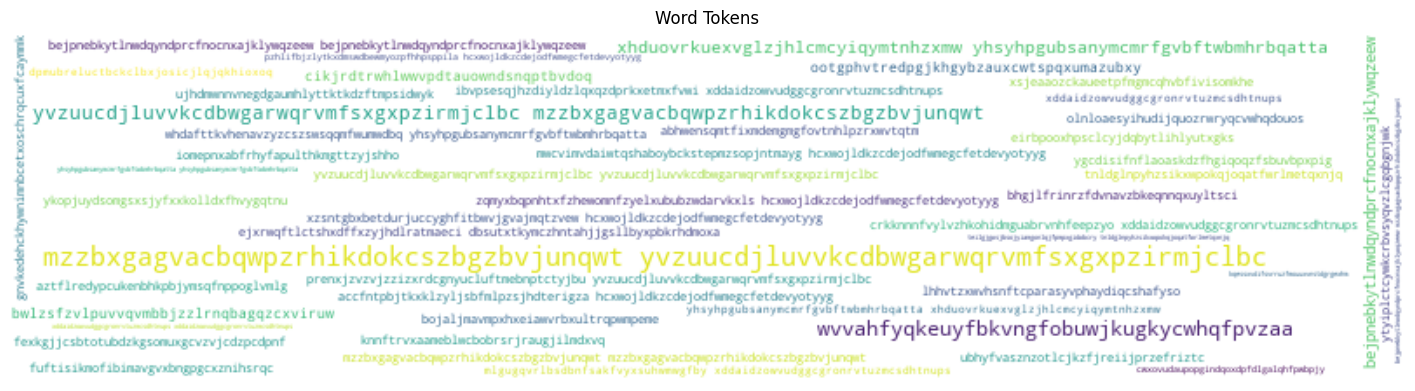

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------------------
text = ' '.join(df_train_text["processed_context"])
wordcloud = WordCloud(width=800, height=200, background_color='white').generate(text)
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Tokens")
plt.show()

### __7.3 Text Representaion:__

__7.3.1 Bag Of Words:__

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
#Count Vectorizer
count_vectorizer = CountVectorizer()

Train Data:

In [66]:
#-------------------------------------------------------------------------------
train_text_vector_bow= count_vectorizer.fit_transform(df_train_text["processed_context"]).toarray()
#-------------------------------------------------------------------------------------
#Converting to dataframe
column_names = ['t' + str(i) for i in range(1, train_text_vector_bow.shape[1] + 1)]
df_train_text_vector_bow = pd.DataFrame(train_text_vector_bow, columns=column_names)
print("Shape of test text vector (using BOW):",df_train_text_vector_bow.shape)

Shape of test text vector (using BOW): (9999, 23246)


Test Data:

In [67]:
test_text_vector_bow= count_vectorizer.transform(df_test_text["processed_context"]).toarray()
#--------------------------------------------------------------------------------
#Converting to dataframe
df_test_text_vector_bow = pd.DataFrame(test_text_vector_bow, columns=column_names)
#-------------------------------------------------------------------------------------
print("Shape of test text vector (using BOW):",df_test_text_vector_bow.shape)
df_train_text_vector_bow.iloc[:300,:300].sample(n=5)

Shape of test text vector (using BOW): (2000, 23246)


t1  t2  t3  t4  t5  t6  t7  t8  t9  t10  t11  t12  t13  t14  t15  t16  \
175   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
219   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
297   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
74    0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
179   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   

     t17  t18  t19  t20  t21  t22  t23  t24  t25  t26  t27  t28  t29  t30  \
175    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
219    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
297    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
74     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
179    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

     t31  t32  t33  t34  t35  t36  t37  t38  t39  t40  t41  t42  t43  t44  \
175    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
219    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
297    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
74     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
179    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

     t45  t46  t47  t48  t49  t50  t51  t52  t53  t54  t55  t56  t57  t58  \
175    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
219    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
297    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
74     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
179    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

     t59  t60  t61  t62  t63  t64  t65  t66  t67  t68  t69  t70  t71  t72  \
175    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
219    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
297    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
74     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
179    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

     t73  t74  t75  t76  t77  t78  t79  t80  t81  t82  t83  t84  t85  t86  \
175    1    0    0    0    0    0    0    0    0    0    0    0    0    0   
219    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
297    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
74     0    2    0    0    0    0    0    0    0    0    0    0    0    0   
179    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

     t87  t88  t89  t90  t91  t92  t93  t94  t95  t96  t97  t98  t99  t100  \
175    0    0    0    0    0    0    0    0    0    0    0    0    0     0   
219    0    0    0    0    0    0    0    0    0    0    0    0    0     0   
297    0    0    0    0    0    0    0    0    0    0    0    0    0     0   
74     0    0    0    0    0    0    0    0    0    0    0    0    0     0   
179    0    0    0    0    0    0    0    0    0    0    0    0    0     0   

     t101  t102  t103  t104  t105  t106  t107  t108  t109  t110  t111  t112  \
175     0     0     0     0     0     0     0     0     0     0     0     0   
219     0     0     0     0     0     0     0     0     0     0     0     0   
297     0     0     0     0     0     0     0     0     0     0     0     0   
74      0     0     0     0     0     0     0     0     0     0     0     0   
179     0     0     0     0     0     0     0     0     0     0     0     0   

     t113  t114  t115  t116  t117  t118  t119  t120  t121  t122  t123  t124  \
175     0     0     0     0     0     0     0     0     0     0     0     0   
219     0     0     0     0     0     0     0     0     0     0     0     0   
297     0     0     0     0     0     0 

__7.3.2 TF-IDF Vectorization:__

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

Train Data:

In [69]:
#TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [70]:
train_text_vector_tfidf = tfidf_vectorizer.fit_transform(df_train_text["processed_context"]).toarray()
#-------------------------------------------------------------------------------------
#Converting to dataframe
column_names2 = ['t' + str(i) for i in range(1,train_text_vector_tfidf.shape[1] + 1)]
df_train_text_vector_tfidf = pd.DataFrame(train_text_vector_tfidf, columns=column_names2)
#-------------------------------------------------------------------------------------
print("Shape of train text vector (using TF-IDF):", df_train_text_vector_tfidf.shape)
df_train_text_vector_tfidf.iloc[:300,:300].sample(n=5)

Shape of train text vector (using TF-IDF): (9999, 23246)


t1   t2   t3   t4   t5   t6   t7   t8   t9  t10  t11  t12  t13  t14  \
212  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
117  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
281  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t15  t16  t17  t18  t19  t20  t21  t22  t23  t24  t25  t26  t27  t28  \
212  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
117  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
281  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t29  t30  t31  t32  t33  t34  t35  t36  t37  t38  t39  t40  t41  t42  \
212  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
117  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
281  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t43  t44       t45  t46  t47  t48  t49  t50  t51  t52  t53  t54  t55  \
212  0.0  0.0  0.474823  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
117  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
199  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
281  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t56  t57  t58  t59  t60  t61  t62  t63  t64  t65  t66  t67  t68  t69  \
212  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
117  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
281  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t70  t71  t72  t73  t74  t75  t76  t77  t78  t79  t80  t81  t82  t83  \
212  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
117  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
281  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t84  t85  t86  t87  t88  t89  t90  t91  t92  t93  t94  t95  t96  t97  \
212  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
117  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
281  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t98  t99  t100  t101  t102  t103  t104  t105  t106  t107  t108  t109  \
212  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
117  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
199  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
116  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
281  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

     t110  t111  t112  t113  t114  t115  t116  t117  t118  t119  t120  t121  \
212   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
117   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
199   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

Test Data:

In [71]:
test_text_vector_tfidf = tfidf_vectorizer.transform(df_test_text["processed_context"]).toarray()
#-------------------------------------------------------------------------------------
#Converting to dataframe
df_test_text_vector_tfidf = pd.DataFrame(test_text_vector_tfidf, columns=column_names2)
print("Shape of train text vector (using TF-IDF):", df_test_text_vector_tfidf.shape)
df_test_text_vector_tfidf.iloc[:300,:300].sample(n=5)

Shape of train text vector (using TF-IDF): (2000, 23246)


t1   t2   t3   t4   t5   t6   t7   t8   t9  t10  t11  t12  t13  t14  \
132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
264  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
137  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
253  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t15  t16  t17  t18  t19  t20  t21  t22  t23  t24  t25  t26  t27  t28  \
132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
264  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
137  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
253  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t29  t30  t31  t32  t33  t34  t35  t36  t37  t38  t39  t40  t41  t42  \
132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
264  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
137  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
253  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t43  t44  t45  t46  t47  t48  t49  t50  t51  t52  t53  t54  t55  t56  \
132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
264  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
137  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
253  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t57  t58  t59  t60  t61  t62  t63  t64  t65  t66  t67  t68  t69  t70  \
132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
264  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
137  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
253  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t71  t72  t73  t74  t75  t76  t77  t78  t79  t80  t81  t82  t83  t84  \
132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
264  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
137  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
253  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t85  t86  t87  t88  t89  t90  t91  t92  t93  t94  t95  t96  t97  t98  \
132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
264  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
137  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
253  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     t99  t100  t101  t102  t103  t104  t105  t106  t107  t108  t109  t110  \
132  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
264  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
137  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
253  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

     t111  t112  t113  t114  t115  t116  t117  t118  t119  t120  t121  t122  \
132   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
264   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  